In [107]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

# **Baca Data**

In [108]:
with open('TERANG BANGET KAYA MASA DEPAN.txt','r', encoding='utf-8') as file: #anda bisa memasukkan judul yang sesuai dengan data anda
    lines=file.readlines()

for line in lines[:10]:
    print(line.strip())


05/06/2024, 08:44 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
05/06/2024, 08:40 - Anthon jcds: created group "JCDS Bandung Raya"
05/06/2024, 08:40 - Anthon jcds: added you
05/06/2024, 08:41 - Anthon jcds: added auliyam jcds:
05/06/2024, 08:42 - Anthon jcds: added Ardy jcds:
05/06/2024, 08:43 - Anthon jcds: added Rena jcds:
05/06/2024, 08:44 - Oji jcds: oji
05/06/2024, 08:44 - You're now an admin
05/06/2024, 08:45 - Anthon jcds: added athaya jcds:
05/06/2024, 08:46 - Anthon jcds: added Elisa jcds:


# **Ekstrak ke Dataframe**

In [109]:
file_path="TERANG BANGET KAYA MASA DEPAN.txt"

timestamps=[]
senders=[]
messages=[]

with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        # delimiter -
        parts=line.split("-",1)
        if len(parts)==2:
            timestamp,message=parts
            timestamps.append(timestamp.strip())

            # delimiter jcds:
            if "jcds:" in message:
                sender_parts=message.split('jcds:',1)
                if len(sender_parts)>1:
                    sender=sender_parts[0].strip()
                    message_content=sender_parts[1].strip()
                else:
                    sender=sender_parts[0].strip()
                    message_content=""
            else:
                sender=""
                message_content=message.strip()

            senders.append(sender)
            messages.append(message_content)

#buat dataframe
df_asli=pd.DataFrame({
    'timestamp':timestamps,
    'sender':senders,
    'message':messages})
df_asli

,timestamp,sender,message
0,"05/06/2024, 08:44",,Messages and calls are end-to-end encrypted. N...
1,"05/06/2024, 08:40",Anthon,"created group ""JCDS Bandung Raya"""
2,"05/06/2024, 08:40",Anthon,added you
3,"05/06/2024, 08:41",Anthon,added auliyam jcds:
4,"05/06/2024, 08:42",Anthon,added Ardy jcds:
...,...,...,...
4430,"01/09/2024, 15:01",Raka,masih belum ngerjain hehe
4431,"01/09/2024, 15:01",Anthon,Samaa
4432,"01/09/2024, 15:01",Raka,"ga ada motivasi, ntar malem paling kalo udah k..."
4433,"01/09/2024, 15:12",Anthon,Besok logic test jam 9 ya bukan 9.30


In [110]:
# cek sender
df_asli['sender'].value_counts()

sender
Anthon     959
Raka       766
Oji        731
Eki        518
O Boy      513
Elisa      277
athaya     267
           129
taufan     107
Kiflano     63
Rena        52
Ardy        43
Farhan       5
Rasyaa       4
auliyam      1
Name: count, dtype: int64

In [111]:
# cek yang sendernya kosong
df_asli['sender'].replace('',pd.NA)
empty_senders=df_asli[df_asli['sender'].isna()]
empty_senders=empty_senders.reset_index(drop=True)
empty_senders

,timestamp,sender,message


added, changed the group, changed this group's icon

In [112]:
df_asli['sender'].replace('',pd.NA)
data=df_asli.dropna(subset=['sender'])
data = data[~data['message'].str.contains("added|changed the group|changed this group's icon|You're now an admin|Messages and calls are end-to-end encrypted",regex=True,na=False)]
data=data.reset_index(drop=True)
data

,timestamp,sender,message
0,"05/06/2024, 08:40",Anthon,"created group ""JCDS Bandung Raya"""
1,"05/06/2024, 08:44",Oji,oji
2,"05/06/2024, 08:46",Ardy,Ardy
3,"05/06/2024, 08:48",Anthon,Kasian mas izul ga diajak
4,"05/06/2024, 08:48",Anthon,Anton btw
...,...,...,...
4406,"01/09/2024, 15:01",Raka,masih belum ngerjain hehe
4407,"01/09/2024, 15:01",Anthon,Samaa
4408,"01/09/2024, 15:01",Raka,"ga ada motivasi, ntar malem paling kalo udah k..."
4409,"01/09/2024, 15:12",Anthon,Besok logic test jam 9 ya bukan 9.30


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  4411 non-null   object
 1   sender     4411 non-null   object
 2   message    4411 non-null   object
dtypes: object(3)
memory usage: 103.5+ KB


In [114]:
data.describe(include=object)

,timestamp,sender,message
count,4411,4411,4411
unique,2311,15,3592
top,https://runestone.academy/ns/books/published/py4e,Anthon,<Media omitted>
freq,24,945,490


# **Word Cloud Data Before Prep**

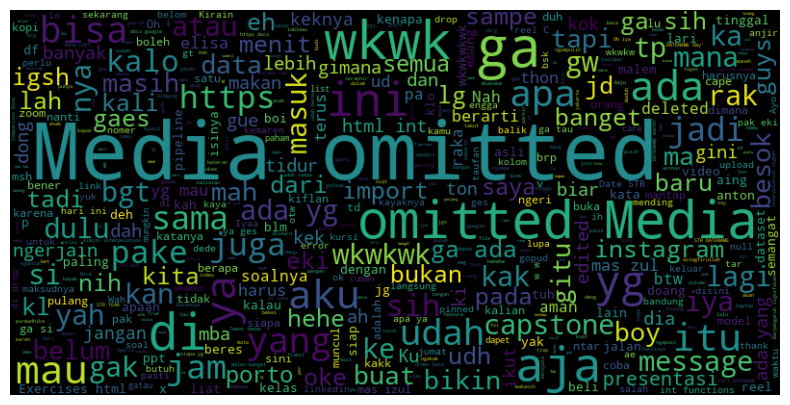

In [115]:
# kata-kata yang paling sering muncul
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot

df=' '.join(data['message'].tolist())
stopword=set(STOPWORDS)

wc= WordCloud(stopwords=stopword, background_color='black', max_words=500, width=800, height=400)
wc.generate(df)
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


# **Frekuensi Data Before Prep**

In [312]:
from collections import Counter
import seaborn as sns

text=''.join(data['message'])
token=text.split()
word_count=Counter(token)

top_words=word_count.most_common(15)
word, count=zip(*top_words)

pastel_colors = sns.color_palette("pastel", len(word))

plt.figure(figsize=(10,5))
bars=plt.bar(word, count, color=pastel_colors)
plt.xlabel('kata')
plt.ylabel('frekuensi')
plt.title('kata-kata yang kami sering ucapkan')

for bar, num in zip(bars,count):
    plt.text(bar.get_x()+bar.get_width()/2-0.1,num+1,str(num),fontsize=12, color='black', ha='center')

plt.show()

TypeError: 'SentimentIntensityAnalyzer' object is not subscriptable

# **Preprocessing Data**

In [117]:
df=pd.DataFrame(data[['message']])
df.head()

,message
0,"created group ""JCDS Bandung Raya"""
1,oji
2,Ardy
3,Kasian mas izul ga diajak
4,Anton btw


In [118]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fauzi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fauzi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [119]:
import nltk
nltk.data.path.append('path/to/nltk_data')

# **Tokenization**

In [120]:


def clean_message(text):
    #hapus metadata dan teks yang tidak relevan
    text = re.sub(r'<Media omitted>', '', text)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    #ubah teks menjadi huruf kecil
    text = text.lower()
    
    #hapus karakter non-alfanumerik (kecuali spasi)
    text = re.sub(r'\W', ' ', text)
    
    #hapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Tokenisasi
    tokens = text.split()
    return tokens

df['cleaned'] = df['message'].apply(clean_message)
df

,message,cleaned
0,"created group ""JCDS Bandung Raya""","[created, group, jcds, bandung, raya]"
1,oji,[oji]
2,Ardy,[ardy]
3,Kasian mas izul ga diajak,"[kasian, mas, izul, ga, diajak]"
4,Anton btw,"[anton, btw]"
...,...,...
4406,masih belum ngerjain hehe,"[masih, belum, ngerjain, hehe]"
4407,Samaa,[samaa]
4408,"ga ada motivasi, ntar malem paling kalo udah k...","[ga, ada, motivasi, ntar, malem, paling, kalo,..."
4409,Besok logic test jam 9 ya bukan 9.30,"[besok, logic, test, jam, 9, ya, bukan, 9, 30]"


# **Hapus StopWord**

In [121]:
import nltk 

In [122]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words=stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fauzi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [123]:
# stop_words.index('sih')
# stop_words.index('iya')

In [124]:
stop_words

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [125]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words ]

df['stopword_removal']=df['cleaned'].apply(lambda x:remove_stopwords(x))
df


,message,cleaned,stopword_removal
0,"created group ""JCDS Bandung Raya""","[created, group, jcds, bandung, raya]","[created, group, jcds, bandung, raya]"
1,oji,[oji],[oji]
2,Ardy,[ardy],[ardy]
3,Kasian mas izul ga diajak,"[kasian, mas, izul, ga, diajak]","[kasian, mas, izul, ga, diajak]"
4,Anton btw,"[anton, btw]","[anton, btw]"
...,...,...,...
4406,masih belum ngerjain hehe,"[masih, belum, ngerjain, hehe]","[ngerjain, hehe]"
4407,Samaa,[samaa],[samaa]
4408,"ga ada motivasi, ntar malem paling kalo udah k...","[ga, ada, motivasi, ntar, malem, paling, kalo,...","[ga, motivasi, ntar, malem, kalo, udah, kepepe..."
4409,Besok logic test jam 9 ya bukan 9.30,"[besok, logic, test, jam, 9, ya, bukan, 9, 30]","[besok, logic, test, jam, 9, ya, 9, 30]"


In [128]:
hasil_filter = df[df['stopword_removal'].str.contains('saya', case=False, na=False)]
hasil_filter

,message,cleaned,stopword_removal


# **Steaming Data**

**pip install Sastrawi**

- Sastrawi adalah pustaka Python yang digunakan untuk pemrosesan bahasa alami (NLP) dalam bahasa Indonesia. Berikut adalah beberapa fitur utama dari Sastrawi:

1. Stemming
- Stemming adalah proses mengurangi kata ke bentuk dasarnya. Dalam bahasa Indonesia, ini sangat berguna karena kata-kata seringkali memiliki akhiran atau prefiks yang berbeda. Sastrawi menyediakan algoritma stemming khusus untuk bahasa Indonesia yang dikenal sebagai "Algoritma Porter" yang disesuaikan.

- Contoh:
    - Kata "berlari" akan diubah menjadi "lari".
    - Kata "pergi" akan diubah menjadi "pergi".

2. Stopwords
- Sastrawi juga menyediakan daftar stopwords untuk bahasa Indonesia, yang bisa digunakan untuk menghilangkan kata-kata yang tidak penting dari teks, seperti preposisi dan konjungsi.

- Contoh:
    - Stopwords seperti "dan", "atau", "di", "yang" bisa dihapus dari teks untuk fokus pada kata-kata yang lebih informatif.

In [129]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

In [130]:
factory=StemmerFactory()
stemmer=factory.create_stemmer()

def stem_data(text):
    return [stemmer.stem(word) for word in text]

df['stemming']=df['stopword_removal'].apply(lambda x: ' '.join(stem_data(x)))
df
    

,message,cleaned,stopword_removal,stemming
0,"created group ""JCDS Bandung Raya""","[created, group, jcds, bandung, raya]","[created, group, jcds, bandung, raya]",created group jcds bandung raya
1,oji,[oji],[oji],oji
2,Ardy,[ardy],[ardy],ardy
3,Kasian mas izul ga diajak,"[kasian, mas, izul, ga, diajak]","[kasian, mas, izul, ga, diajak]",kasi mas izul ga ajak
4,Anton btw,"[anton, btw]","[anton, btw]",anton btw
...,...,...,...,...
4406,masih belum ngerjain hehe,"[masih, belum, ngerjain, hehe]","[ngerjain, hehe]",ngerjain hehe
4407,Samaa,[samaa],[samaa],samaa
4408,"ga ada motivasi, ntar malem paling kalo udah k...","[ga, ada, motivasi, ntar, malem, paling, kalo,...","[ga, motivasi, ntar, malem, kalo, udah, kepepe...",ga motivasi ntar malem kalo udah pepet wkwk
4409,Besok logic test jam 9 ya bukan 9.30,"[besok, logic, test, jam, 9, ya, bukan, 9, 30]","[besok, logic, test, jam, 9, ya, 9, 30]",besok logic test jam 9 ya 9 30


In [131]:
hasil_filter = df[df['stemming'].str.contains('saya', case=False, na=False)]
hasil_filter

,message,cleaned,stopword_removal,stemming
4160,Pulang sayah,"[pulang, sayah]","[pulang, sayah]",pulang sayah
4256,pas banget baru mau buat ppt sayah wkwk,"[pas, banget, baru, mau, buat, ppt, sayah, wkwk]","[pas, banget, ppt, sayah, wkwk]",pas banget ppt sayah wkwk
4317,"Besok mau wisuda dulu, sayang dulu ga wisuda 🥴","[besok, mau, wisuda, dulu, sayang, dulu, ga, w...","[besok, wisuda, sayang, ga, wisuda]",besok wisuda sayang ga wisuda
4351,Aku sayang ibu,"[aku, sayang, ibu]",[sayang],sayang


In [132]:
# cek duplikasi hasil stemming
df[df.duplicated(subset=['stemming'])]

,message,cleaned,stopword_removal,stemming
12,<Media omitted>,[],[],
13,😭😭😭,[],[],
32,entah,[entah],[],
40,😂,[],[],
41,<Media omitted>,[],[],
...,...,...,...,...
4397,nih,[nih],[nih],nih
4399,<Media omitted>,[],[],
4401,Biar apa 😅,"[biar, apa]",[biar],biar
4405,1,[1],[1],1


In [133]:
# df.drop_duplicates(subset='stemming',keep='first',inplace=True)
# df

In [134]:
# drop yang kosong
df=df.dropna(subset=['stemming'])
df.reset_index(drop=True, inplace=True)
df

,message,cleaned,stopword_removal,stemming
0,"created group ""JCDS Bandung Raya""","[created, group, jcds, bandung, raya]","[created, group, jcds, bandung, raya]",created group jcds bandung raya
1,oji,[oji],[oji],oji
2,Ardy,[ardy],[ardy],ardy
3,Kasian mas izul ga diajak,"[kasian, mas, izul, ga, diajak]","[kasian, mas, izul, ga, diajak]",kasi mas izul ga ajak
4,Anton btw,"[anton, btw]","[anton, btw]",anton btw
...,...,...,...,...
4406,masih belum ngerjain hehe,"[masih, belum, ngerjain, hehe]","[ngerjain, hehe]",ngerjain hehe
4407,Samaa,[samaa],[samaa],samaa
4408,"ga ada motivasi, ntar malem paling kalo udah k...","[ga, ada, motivasi, ntar, malem, paling, kalo,...","[ga, motivasi, ntar, malem, kalo, udah, kepepe...",ga motivasi ntar malem kalo udah pepet wkwk
4409,Besok logic test jam 9 ya bukan 9.30,"[besok, logic, test, jam, 9, ya, bukan, 9, 30]","[besok, logic, test, jam, 9, ya, 9, 30]",besok logic test jam 9 ya 9 30


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   message           4411 non-null   object
 1   cleaned           4411 non-null   object
 2   stopword_removal  4411 non-null   object
 3   stemming          4411 non-null   object
dtypes: object(4)
memory usage: 138.0+ KB


In [136]:
df=df[~(df['stemming'].isna()|df['stemming'].str.strip().eq(''))]

In [137]:
df=df[df['stemming'].str.strip() != 'null']

In [138]:
df.to_csv('hasil_prep_data.csv',encoding='utf8',index=False)

# **Word Cloud Data After Prep**

In [139]:
df_baru=pd.read_csv('hasil_prep_data.csv')
df_baru = df_baru.dropna(subset=['stemming'])
df_baru.reset_index(drop=True, inplace=True)
df_baru

,message,cleaned,stopword_removal,stemming
0,"created group ""JCDS Bandung Raya""","['created', 'group', 'jcds', 'bandung', 'raya']","['created', 'group', 'jcds', 'bandung', 'raya']",created group jcds bandung raya
1,oji,['oji'],['oji'],oji
2,Ardy,['ardy'],['ardy'],ardy
3,Kasian mas izul ga diajak,"['kasian', 'mas', 'izul', 'ga', 'diajak']","['kasian', 'mas', 'izul', 'ga', 'diajak']",kasi mas izul ga ajak
4,Anton btw,"['anton', 'btw']","['anton', 'btw']",anton btw
...,...,...,...,...
3668,masih belum ngerjain hehe,"['masih', 'belum', 'ngerjain', 'hehe']","['ngerjain', 'hehe']",ngerjain hehe
3669,Samaa,['samaa'],['samaa'],samaa
3670,"ga ada motivasi, ntar malem paling kalo udah k...","['ga', 'ada', 'motivasi', 'ntar', 'malem', 'pa...","['ga', 'motivasi', 'ntar', 'malem', 'kalo', 'u...",ga motivasi ntar malem kalo udah pepet wkwk
3671,Besok logic test jam 9 ya bukan 9.30,"['besok', 'logic', 'test', 'jam', '9', 'ya', '...","['besok', 'logic', 'test', 'jam', '9', 'ya', '...",besok logic test jam 9 ya 9 30


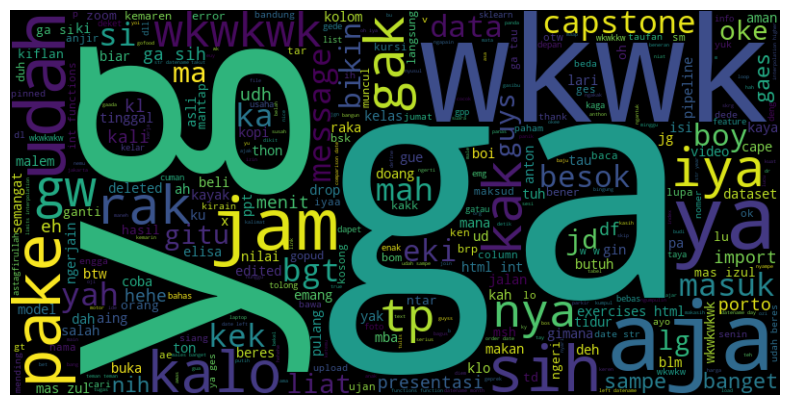

In [140]:
# kata-kata yang paling sering muncul
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot

data_baru=' '.join(df_baru['stemming'].tolist())
stopword=set(STOPWORDS)

wc= WordCloud(stopwords=stopword, background_color='black', max_words=500, width=800, height=400)
wc.generate(data_baru)
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


# **Frekuensi Data After Prep**

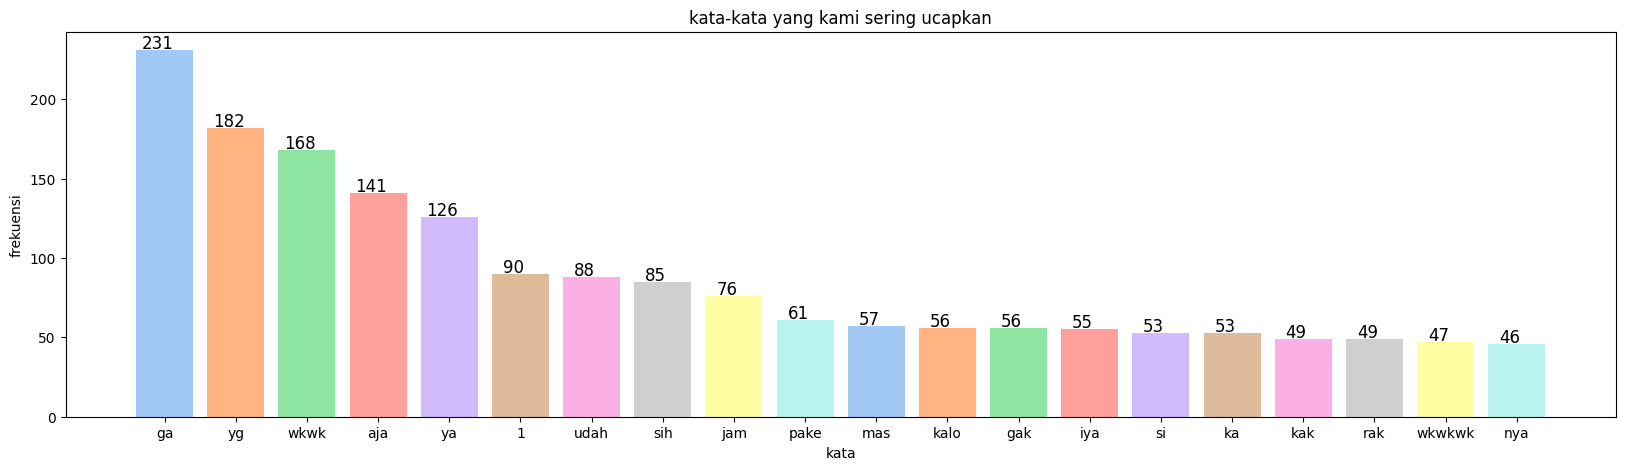

In [141]:
from collections import Counter
import seaborn as sns

text=' '.join(df_baru['stemming'])
token=text.split()
word_count=Counter(token)

top_words=word_count.most_common(20)
word, count=zip(*top_words)

pastel_colors = sns.color_palette("pastel", len(word))

plt.figure(figsize=(20,5))
bars=plt.bar(word, count, color=pastel_colors)
plt.xlabel('kata')
plt.ylabel('frekuensi')
plt.title('kata-kata yang kami sering ucapkan')

for bar, num in zip(bars,count):
    plt.text(bar.get_x()+bar.get_width()/2-0.1,num+1,str(num),fontsize=12, color='black', ha='center')

plt.show()

In [142]:
text = ' '.join(df_baru['stemming'])

# Tokenisasi teks
token = text.split()

# Hitung frekuensi kata
word_count = Counter(token)

# Ambil 10 kata teratas
top_words = word_count.most_common(10)
print(top_words)

[('ga', 231), ('yg', 182), ('wkwk', 168), ('aja', 141), ('ya', 126), ('1', 90), ('udah', 88), ('sih', 85), ('jam', 76), ('pake', 61)]


In [143]:
any(df_baru['stemming'].apply(lambda x: 'saya' in x))

True

In [144]:
df_baru.to_csv('hasil_prep_stemming.csv',encoding='utf8',index=False)

# **Normalisasi Kata Baku**

In [145]:
data1=pd.read_csv('hasil_prep_data.csv', encoding='utf8')
data_1=pd.DataFrame(data1['stemming'])
data_1.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3673 entries, 0 to 3672
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   stemming  3673 non-null   object
dtypes: object(1)
memory usage: 28.8+ KB


In [146]:
data_2=pd.read_excel('normalisasi_kata.xlsx')
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4471 entries, 0 to 4470
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tidak_baku  4471 non-null   object
 1   kata_baku   4471 non-null   object
dtypes: object(2)
memory usage: 70.0+ KB


In [147]:
data_2[data_2['kata_baku']=='terima kasih']

,tidak_baku,kata_baku


In [148]:
kamus_tidak_baku=dict(zip(data_2['tidak_baku'],data_2['kata_baku']))

In [149]:
def replace_kata(text, kamus_replace):
    if isinstance(text,str):
        words=text.split()
        replace_words=[]
        kalimat_baku=[]
        kata_replace=[]
        kata_tidak_baku_hash=[]

        for word in words:
            if word in kamus_replace:
                baku=kamus_replace[word]
                if isinstance(baku,str)and all(char.isalpha() for char in baku):
                    replace_words.append(baku)
                    kalimat_baku.append(baku)
                    kata_replace.append(word)
                    kata_tidak_baku_hash.append(hash(word))
                else:
                    replace_words.append('<karakter eksplisit>')
                    kalimat_baku.append(word)
            else:
                replace_words.append(word)
        replaced_text=' '.join(replace_words)
    else:
        replaced_text=''
        kalimat_baku=[]
        kata_replace=[]
        kata_tidak_baku_hash=[]
    return replaced_text, kalimat_baku, kata_replace,kata_tidak_baku_hash       

In [150]:
data_1[['normalisasi', 'kata_ganti', 'kata_asli', 'Kata_Tidak_Baku_Hash']] = data_1['stemming'].apply(lambda x: replace_kata(x, kamus_tidak_baku)).apply(pd.Series)

In [151]:
data_1[['stemming','kata_asli','kata_ganti', 'normalisasi']].head(10)

,stemming,kata_asli,kata_ganti,normalisasi
0,created group jcds bandung raya,[],[],created group jcds bandung raya
1,oji,[],[],oji
2,ardy,[],[],ardy
3,kasi mas izul ga ajak,"[kasi, mas, izul, ga]","[kasih, kakak, zulfikar, tidak]",kasih kakak zulfikar tidak ajak
4,anton btw,[],[],anton btw
5,elisa hadir,[],[],elisa hadir
6,athayaa,[athayaa],[athaya],athaya
7,aul,[],[],aul
8,raka,[],[],raka
9,zoom code 435 055 9201,[],[],zoom code 435 055 9201


In [152]:
data_1[data_1['normalisasi'].str.contains('<karakter', na=False)]


,stemming,normalisasi,kata_ganti,kata_asli,Kata_Tidak_Baku_Hash


In [153]:
data_1['normalisasi'] = data_1['normalisasi'].replace('terimakasih', 'terima kasih')

In [154]:
data_1['normalisasi'] = data_1['normalisasi'].replace('thank you', 'terima kasih')

# **Word Cloud Data After Normalisasi Data**

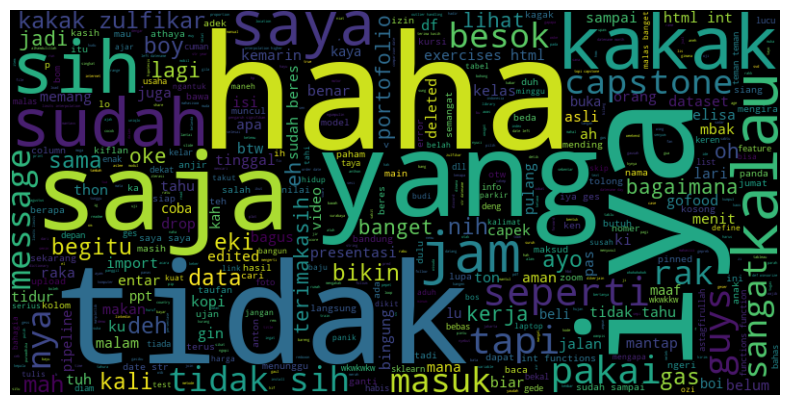

In [155]:
# kata-kata yang paling sering muncul
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot

data_baru=' '.join(data_1['normalisasi'].tolist())
stopword=set(STOPWORDS)

wc= WordCloud(stopwords=stopword, background_color='black', max_words=500, width=800, height=400)
wc.generate(data_baru)
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


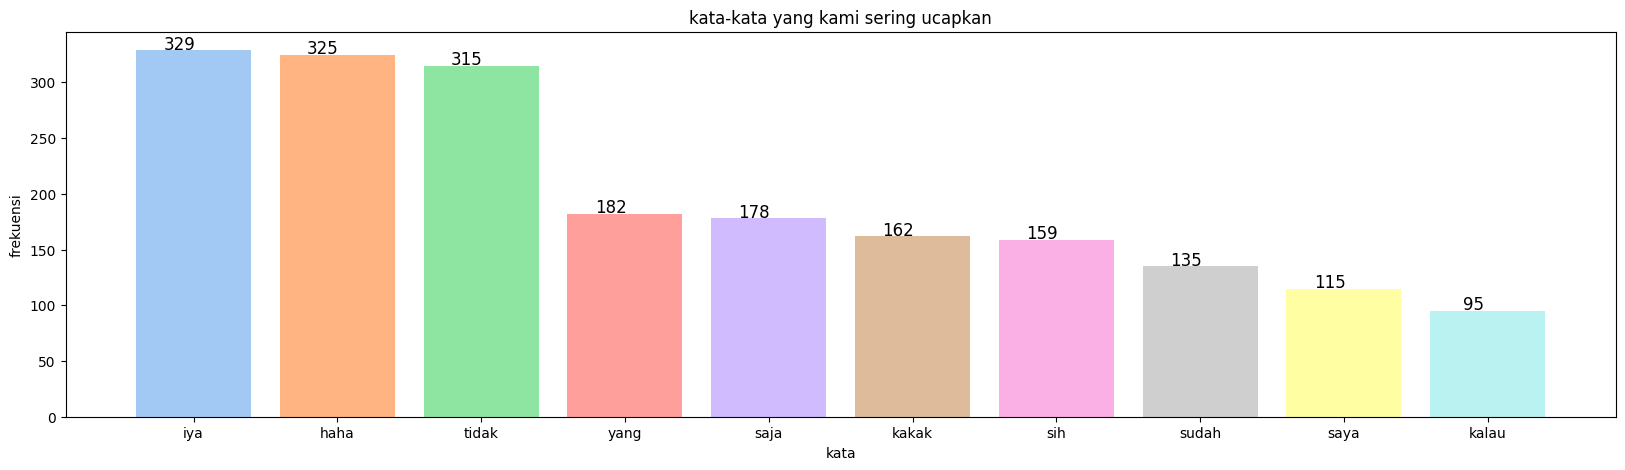

In [156]:
from collections import Counter
import seaborn as sns

text=' '.join(data_1['normalisasi'])
token=text.split()
word_count=Counter(token)

top_words=word_count.most_common(10)
word, count=zip(*top_words)

pastel_colors = sns.color_palette("pastel", len(word))

plt.figure(figsize=(20,5))
bars=plt.bar(word, count, color=pastel_colors)
plt.xlabel('kata')
plt.ylabel('frekuensi')
plt.title('kata-kata yang kami sering ucapkan')

for bar, num in zip(bars,count):
    plt.text(bar.get_x()+bar.get_width()/2-0.1,num+1,str(num),fontsize=12, color='black', ha='center')

plt.show()

# **Tokenisasi Dua**

In [157]:
def clean_message(text):
    #hapus metadata dan teks yang tidak relevan
    text = re.sub(r'<Media omitted>', '', text)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    #ubah teks menjadi huruf kecil
    text = text.lower()
    
    #hapus karakter non-alfanumerik (kecuali spasi)
    text = re.sub(r'\W', ' ', text)
    
    #hapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()
    
    #tokenisasi
    tokens = text.split()
    return tokens

data_1['tokenisasi_2']=data_1['normalisasi'].apply(clean_message)
data_1

,stemming,normalisasi,kata_ganti,kata_asli,Kata_Tidak_Baku_Hash,tokenisasi_2
0,created group jcds bandung raya,created group jcds bandung raya,[],[],[],"[created, group, jcds, bandung, raya]"
1,oji,oji,[],[],[],[oji]
2,ardy,ardy,[],[],[],[ardy]
3,kasi mas izul ga ajak,kasih kakak zulfikar tidak ajak,"[kasih, kakak, zulfikar, tidak]","[kasi, mas, izul, ga]","[-3322329879062145954, 5056913833249279015, 11...","[kasih, kakak, zulfikar, tidak, ajak]"
4,anton btw,anton btw,[],[],[],"[anton, btw]"
...,...,...,...,...,...,...
3668,ngerjain hehe,kerja haha,"[kerja, haha]","[ngerjain, hehe]","[-6625760415063736451, -1330242864130130797]","[kerja, haha]"
3669,samaa,sama,[sama],[samaa],[-281899686315779760],[sama]
3670,ga motivasi ntar malem kalo udah pepet wkwk,tidak motivasi entar malam kalau sudah pepet haha,"[tidak, entar, malam, kalau, sudah, haha]","[ga, ntar, malem, kalo, udah, wkwk]","[-6422947155264107286, 1796082831256261767, -4...","[tidak, motivasi, entar, malam, kalau, sudah, ..."
3671,besok logic test jam 9 ya 9 30,besok logic test jam 9 iya 9 30,[iya],[ya],[1767627153548929808],"[besok, logic, test, jam, 9, iya, 9, 30]"


# **Stopword Dua**

In [158]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words ]

data_1['stopword_2']=data_1['tokenisasi_2'].apply(lambda x:remove_stopwords(x))
data_1

,stemming,normalisasi,kata_ganti,kata_asli,Kata_Tidak_Baku_Hash,tokenisasi_2,stopword_2
0,created group jcds bandung raya,created group jcds bandung raya,[],[],[],"[created, group, jcds, bandung, raya]","[created, group, jcds, bandung, raya]"
1,oji,oji,[],[],[],[oji],[oji]
2,ardy,ardy,[],[],[],[ardy],[ardy]
3,kasi mas izul ga ajak,kasih kakak zulfikar tidak ajak,"[kasih, kakak, zulfikar, tidak]","[kasi, mas, izul, ga]","[-3322329879062145954, 5056913833249279015, 11...","[kasih, kakak, zulfikar, tidak, ajak]","[kasih, kakak, zulfikar, ajak]"
4,anton btw,anton btw,[],[],[],"[anton, btw]","[anton, btw]"
...,...,...,...,...,...,...,...
3668,ngerjain hehe,kerja haha,"[kerja, haha]","[ngerjain, hehe]","[-6625760415063736451, -1330242864130130797]","[kerja, haha]","[kerja, haha]"
3669,samaa,sama,[sama],[samaa],[-281899686315779760],[sama],[]
3670,ga motivasi ntar malem kalo udah pepet wkwk,tidak motivasi entar malam kalau sudah pepet haha,"[tidak, entar, malam, kalau, sudah, haha]","[ga, ntar, malem, kalo, udah, wkwk]","[-6422947155264107286, 1796082831256261767, -4...","[tidak, motivasi, entar, malam, kalau, sudah, ...","[motivasi, entar, malam, pepet, haha]"
3671,besok logic test jam 9 ya 9 30,besok logic test jam 9 iya 9 30,[iya],[ya],[1767627153548929808],"[besok, logic, test, jam, 9, iya, 9, 30]","[besok, logic, test, jam, 9, iya, 9, 30]"


In [159]:
hasil_filter = data_1[data_1['stopword_2'].str.contains('saya', case=False, na=False)]

# **Stemming Dua**

In [160]:
factory=StemmerFactory()
stemmer=factory.create_stemmer()

def stem_data(text):
    return [stemmer.stem(word) for word in text]

data_1['stemming_2']=data_1['stopword_2'].apply(lambda x: ' '.join(stem_data(x)))
data_1

,stemming,normalisasi,kata_ganti,kata_asli,Kata_Tidak_Baku_Hash,tokenisasi_2,stopword_2,stemming_2
0,created group jcds bandung raya,created group jcds bandung raya,[],[],[],"[created, group, jcds, bandung, raya]","[created, group, jcds, bandung, raya]",created group jcds bandung raya
1,oji,oji,[],[],[],[oji],[oji],oji
2,ardy,ardy,[],[],[],[ardy],[ardy],ardy
3,kasi mas izul ga ajak,kasih kakak zulfikar tidak ajak,"[kasih, kakak, zulfikar, tidak]","[kasi, mas, izul, ga]","[-3322329879062145954, 5056913833249279015, 11...","[kasih, kakak, zulfikar, tidak, ajak]","[kasih, kakak, zulfikar, ajak]",kasih kakak zulfikar ajak
4,anton btw,anton btw,[],[],[],"[anton, btw]","[anton, btw]",anton btw
...,...,...,...,...,...,...,...,...
3668,ngerjain hehe,kerja haha,"[kerja, haha]","[ngerjain, hehe]","[-6625760415063736451, -1330242864130130797]","[kerja, haha]","[kerja, haha]",kerja haha
3669,samaa,sama,[sama],[samaa],[-281899686315779760],[sama],[],
3670,ga motivasi ntar malem kalo udah pepet wkwk,tidak motivasi entar malam kalau sudah pepet haha,"[tidak, entar, malam, kalau, sudah, haha]","[ga, ntar, malem, kalo, udah, wkwk]","[-6422947155264107286, 1796082831256261767, -4...","[tidak, motivasi, entar, malam, kalau, sudah, ...","[motivasi, entar, malam, pepet, haha]",motivasi entar malam pepet haha
3671,besok logic test jam 9 ya 9 30,besok logic test jam 9 iya 9 30,[iya],[ya],[1767627153548929808],"[besok, logic, test, jam, 9, iya, 9, 30]","[besok, logic, test, jam, 9, iya, 9, 30]",besok logic test jam 9 iya 9 30


In [161]:
data_1=data_1.dropna(subset=['stemming_2'])
data_1.reset_index(drop=True, inplace=True)
data_1

,stemming,normalisasi,kata_ganti,kata_asli,Kata_Tidak_Baku_Hash,tokenisasi_2,stopword_2,stemming_2
0,created group jcds bandung raya,created group jcds bandung raya,[],[],[],"[created, group, jcds, bandung, raya]","[created, group, jcds, bandung, raya]",created group jcds bandung raya
1,oji,oji,[],[],[],[oji],[oji],oji
2,ardy,ardy,[],[],[],[ardy],[ardy],ardy
3,kasi mas izul ga ajak,kasih kakak zulfikar tidak ajak,"[kasih, kakak, zulfikar, tidak]","[kasi, mas, izul, ga]","[-3322329879062145954, 5056913833249279015, 11...","[kasih, kakak, zulfikar, tidak, ajak]","[kasih, kakak, zulfikar, ajak]",kasih kakak zulfikar ajak
4,anton btw,anton btw,[],[],[],"[anton, btw]","[anton, btw]",anton btw
...,...,...,...,...,...,...,...,...
3668,ngerjain hehe,kerja haha,"[kerja, haha]","[ngerjain, hehe]","[-6625760415063736451, -1330242864130130797]","[kerja, haha]","[kerja, haha]",kerja haha
3669,samaa,sama,[sama],[samaa],[-281899686315779760],[sama],[],
3670,ga motivasi ntar malem kalo udah pepet wkwk,tidak motivasi entar malam kalau sudah pepet haha,"[tidak, entar, malam, kalau, sudah, haha]","[ga, ntar, malem, kalo, udah, wkwk]","[-6422947155264107286, 1796082831256261767, -4...","[tidak, motivasi, entar, malam, kalau, sudah, ...","[motivasi, entar, malam, pepet, haha]",motivasi entar malam pepet haha
3671,besok logic test jam 9 ya 9 30,besok logic test jam 9 iya 9 30,[iya],[ya],[1767627153548929808],"[besok, logic, test, jam, 9, iya, 9, 30]","[besok, logic, test, jam, 9, iya, 9, 30]",besok logic test jam 9 iya 9 30


In [162]:
data_1=data_1[~(data_1['stemming_2'].isna()|data_1['stemming_2'].str.strip().eq(''))]
data_1=data_1[data_1['stemming_2'].str.strip() != 'null']

In [163]:
data_1.reset_index(drop=True, inplace=True)
data_1

,stemming,normalisasi,kata_ganti,kata_asli,Kata_Tidak_Baku_Hash,tokenisasi_2,stopword_2,stemming_2
0,created group jcds bandung raya,created group jcds bandung raya,[],[],[],"[created, group, jcds, bandung, raya]","[created, group, jcds, bandung, raya]",created group jcds bandung raya
1,oji,oji,[],[],[],[oji],[oji],oji
2,ardy,ardy,[],[],[],[ardy],[ardy],ardy
3,kasi mas izul ga ajak,kasih kakak zulfikar tidak ajak,"[kasih, kakak, zulfikar, tidak]","[kasi, mas, izul, ga]","[-3322329879062145954, 5056913833249279015, 11...","[kasih, kakak, zulfikar, tidak, ajak]","[kasih, kakak, zulfikar, ajak]",kasih kakak zulfikar ajak
4,anton btw,anton btw,[],[],[],"[anton, btw]","[anton, btw]",anton btw
...,...,...,...,...,...,...,...,...
3555,1,1,[],[],[],[1],[1],1
3556,ngerjain hehe,kerja haha,"[kerja, haha]","[ngerjain, hehe]","[-6625760415063736451, -1330242864130130797]","[kerja, haha]","[kerja, haha]",kerja haha
3557,ga motivasi ntar malem kalo udah pepet wkwk,tidak motivasi entar malam kalau sudah pepet haha,"[tidak, entar, malam, kalau, sudah, haha]","[ga, ntar, malem, kalo, udah, wkwk]","[-6422947155264107286, 1796082831256261767, -4...","[tidak, motivasi, entar, malam, kalau, sudah, ...","[motivasi, entar, malam, pepet, haha]",motivasi entar malam pepet haha
3558,besok logic test jam 9 ya 9 30,besok logic test jam 9 iya 9 30,[iya],[ya],[1767627153548929808],"[besok, logic, test, jam, 9, iya, 9, 30]","[besok, logic, test, jam, 9, iya, 9, 30]",besok logic test jam 9 iya 9 30


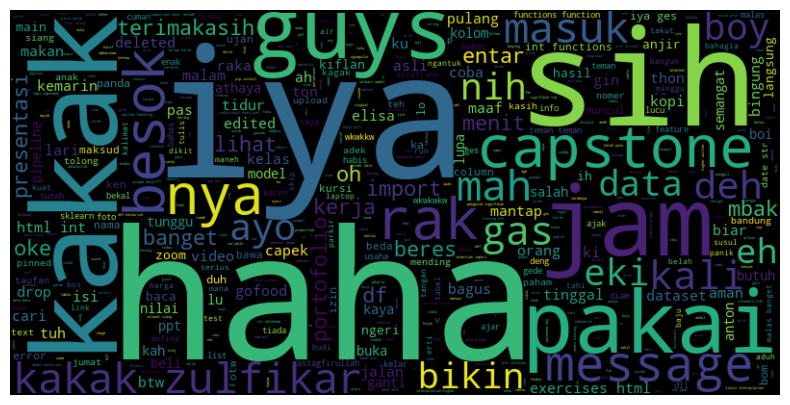

In [164]:
# kata-kata yang paling sering muncul
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot

data_baru_3=' '.join(data_1['stemming_2'].tolist())
stopword=set(STOPWORDS)

wc= WordCloud(stopwords=stopword, background_color='black', max_words=500, width=800, height=400)
wc.generate(data_baru_3)
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

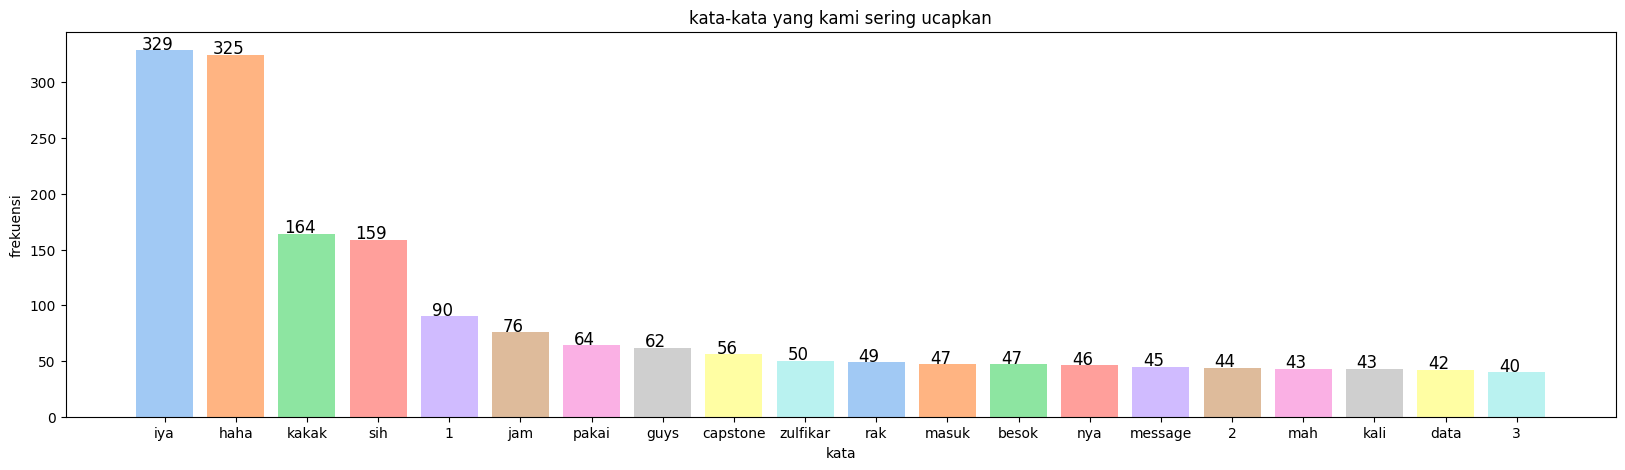

In [165]:
from collections import Counter
import seaborn as sns

text=' '.join(data_1['stemming_2'])
token=text.split()
word_count=Counter(token)

top_words=word_count.most_common(20)
word, count=zip(*top_words)

pastel_colors = sns.color_palette("pastel", len(word))

plt.figure(figsize=(20,5))
bars=plt.bar(word, count, color=pastel_colors)
plt.xlabel('kata')
plt.ylabel('frekuensi')
plt.title('kata-kata yang kami sering ucapkan')

for bar, num in zip(bars,count):
    plt.text(bar.get_x()+bar.get_width()/2-0.1,num+1,str(num),fontsize=12, color='black', ha='center')

plt.show()

In [166]:
hasil_filter = data_1[data_1['stemming_2'].str.contains(' nya', case=False, na=False)]


In [201]:
# pip install googletrans==4.0.0-rc1

In [203]:
from googletrans import Translator
translator = Translator()

# Fungsi untuk menerjemahkan teks
def translate_text(text):
    try:
        translated = translator.translate(text, src='id', dest='en')
        return translated.text
    except Exception as e:
        return str(e)

# Terapkan terjemahan pada kolom 'stemming_2'
data_1['stemming_2_english'] = data_1['stemming_2'].apply(translate_text)

In [246]:
data_1['stemming_2_english'].sample(n=10, random_state=42)

3544                                                 Mpok
184                                     Capstone Module 1
3439                                                  Yes
3446                                                  Ges
2683                                               anyway
1501                                     explicit content
211                                                   Yes
179     Int Functions Functions Tups Dicts Exercises HTML
1513                                         You are free
879                               250 rows are lost later
Name: stemming_2_english, dtype: object

In [278]:
data_1['stemming_2_english'] = data_1['stemming_2_english'].replace('ha ha', 'haha', regex=True)

In [279]:
data_1['stemming_2_english'] = data_1['stemming_2_english'].replace('Love', 'give', regex=True)
data_1['stemming_2_english'] = data_1['stemming_2_english'].replace('love', 'give', regex=True)

In [280]:
def clean_message(text):
    #hapus metadata dan teks yang tidak relevan
    text=re.sub(r'<Media omitted>','',text)
    text=re.sub(r'http\S+|www\S+|https\S+','',text,flags=re.MULTILINE)
    
    #ubah teks menjadi huruf kecil
    text=text.lower()
    
    #hapus karakter non-alfanumerik (kecuali spasi)
    text=re.sub(r'\W',' ',text)
    
    #hapus spasi berlebih
    text=re.sub(r'\s+',' ',text).strip()
    
    #tokenization
    tokens=text.split()
    return tokens

data_1['stemming_2_english_clean']=data_1['stemming_2_english'].apply(clean_message)
data_1=data_1[['stemming_2_english','stemming_2_english_clean']]
data_1.sample(n=10, random_state=42)

,stemming_2_english,stemming_2_english_clean
3544,Mpok,[mpok]
184,Capstone Module 1,"[capstone, module, 1]"
3439,Yes,[yes]
3446,Ges,[ges]
2683,anyway,[anyway]
1501,explicit content,"[explicit, content]"
211,Yes,[yes]
179,Int Functions Functions Tups Dicts Exercises HTML,"[int, functions, functions, tups, dicts, exerc..."
1513,You are free,"[you, are, free]"
879,250 rows are lost later,"[250, rows, are, lost, later]"


In [281]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fauzi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [282]:
english_stopwords = stopwords.words('english')
english_stopwords.remove('not')


In [283]:
def remove_stopwords(text):
    return [word for word in text if word not in english_stopwords ]

data_1['clean_clear']=data_1['stemming_2_english_clean'].apply(lambda x:remove_stopwords(x))
data_1.sample(n=10, random_state=42)

C:\Users\fauzi\AppData\Local\Temp\ipykernel_134108\3795231905.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['clean_clear']=data_1['stemming_2_english_clean'].apply(lambda x:remove_stopwords(x))


,stemming_2_english,stemming_2_english_clean,clean_clear
3544,Mpok,[mpok],[mpok]
184,Capstone Module 1,"[capstone, module, 1]","[capstone, module, 1]"
3439,Yes,[yes],[yes]
3446,Ges,[ges],[ges]
2683,anyway,[anyway],[anyway]
1501,explicit content,"[explicit, content]","[explicit, content]"
211,Yes,[yes],[yes]
179,Int Functions Functions Tups Dicts Exercises HTML,"[int, functions, functions, tups, dicts, exerc...","[int, functions, functions, tups, dicts, exerc..."
1513,You are free,"[you, are, free]",[free]
879,250 rows are lost later,"[250, rows, are, lost, later]","[250, rows, lost, later]"


In [284]:
data_1['clean_clear']
# data_1=data_1[~(data_1['clean_clear'].isna()|data_1['clean_clear'].str.strip().eq(''))]
# data_1=data_1[data_1['clean_clear'].str.strip() != 'null']

0         [created, group, jcds, bandung, raya]
1                                         [oji]
2                                        [ardy]
3            [give, brother, zulfikar, invites]
4                                  [anton, btw]
                         ...                   
3555                                        [1]
3556                               [work, haha]
3557    [motivation, later, night, pepet, haha]
3558     [tomorrow, logic, test, 9, yes, 9, 30]
3559                                        [1]
Name: clean_clear, Length: 3560, dtype: object

In [285]:
def join_words(word_list):
    return ' '.join(word_list)

# Terapkan fungsi ke kolom DataFrame
data_1['sentences'] = data_1['clean_clear'].apply(join_words)
data_1['sentences'].sample(n=10, random_state=42)

3544                                                 mpok
184                                     capstone module 1
3439                                                  yes
3446                                                  ges
2683                                               anyway
1501                                     explicit content
211                                                   yes
179     int functions functions tups dicts exercises html
1513                                                 free
879                                   250 rows lost later
Name: sentences, dtype: object

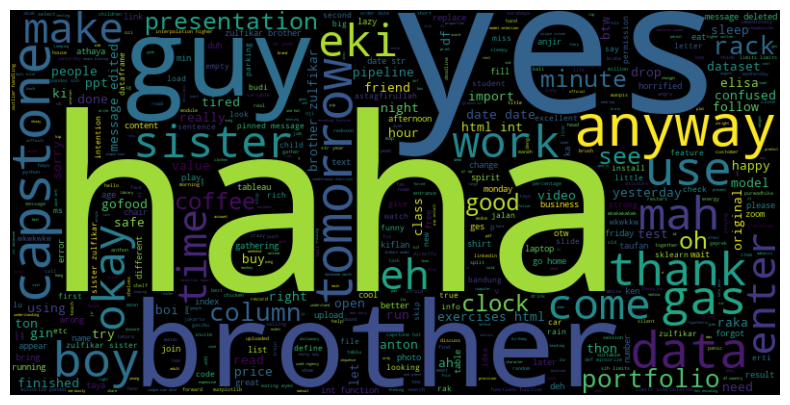

In [326]:
# kata-kata yang paling sering muncul
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot

data_baru_3=' '.join(data_1['sentences'].tolist())
stopword=set(STOPWORDS)

wc= WordCloud(stopwords=stopword, background_color='black', max_words=500, width=800, height=400)
wc.generate(data_baru_3)
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

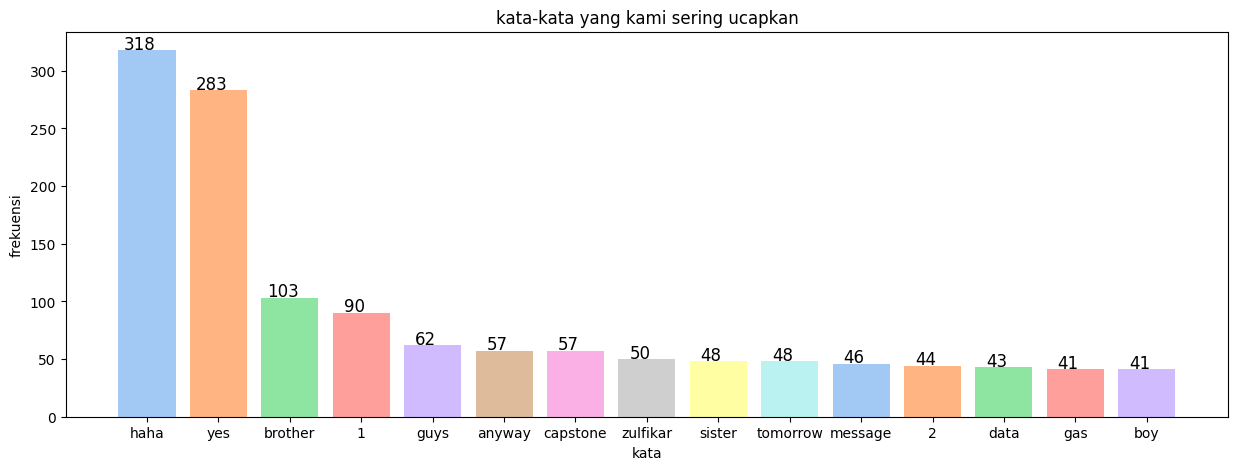

In [327]:
from collections import Counter
import seaborn as sns

text=' '.join(data_1['sentences'])
token=text.split()
word_count=Counter(token)

top_words=word_count.most_common(15)
word, count=zip(*top_words)

pastel_colors = sns.color_palette("pastel", len(word))

plt.figure(figsize=(15,5))
bars=plt.bar(word, count, color=pastel_colors)
plt.xlabel('kata')
plt.ylabel('frekuensi')
plt.title('kata-kata yang kami sering ucapkan')

for bar, num in zip(bars,count):
    plt.text(bar.get_x()+bar.get_width()/2-0.1,num+1,str(num),fontsize=12, color='black', ha='center')

plt.show()

# **Sentimen**

| **Fitur**           | **NLTK**                                  | **VADER**                                | **TextBlob**                           |
|---------------------|-------------------------------------------|------------------------------------------|---------------------------------------|
| **Fokus**           | Umum, pemrosesan bahasa alami             | Teks sosial, bahasa informal              | Umum, analisis sentimen dasar          |
| **Model Sentimen**  | Tidak ada model bawaan                    | Model spesifik untuk sentimen sosial      | Model berbasis aturan                  |
| **Kemampuan Penanganan** | Fleksibel, memerlukan implementasi       | Menangani emotikon, singkatan, bahasa informal | Antarmuka sederhana, tidak banyak penyesuaian |
| **Akurasi untuk Media Sosial** | Bergantung pada model kustom          | Sangat baik                              | Kurang efektif dibandingkan VADER      |
| **Kelebihan**       | - Fleksibilitas tinggi untuk penyesuaian dan pengembangan model kustom.<br>- Dapat digunakan untuk berbagai aplikasi NLP lainnya. | - Sangat efektif dalam menangani teks sosial dan informal.<br>- Mempertimbangkan emotikon, singkatan, dan bahasa slang. | - Antarmuka yang sederhana dan mudah digunakan.<br>- Mudah diintegrasikan untuk analisis sentimen dasar. |
| **Kekurangan**      | - Memerlukan waktu dan usaha untuk membangun model kustom.<br>- Tidak memiliki model bawaan khusus untuk sentimen. | - Terbatas pada analisis sentimen, tanpa fitur tambahan.<br>- Mungkin tidak seakurat dalam konteks non-sosial atau bahasa formal. | - Akurasi dalam konteks bahasa informal seperti WhatsApp mungkin kurang optimal.<br>- Tidak menangani emotikon dan singkatan dengan baik. |

## **NTLK**

In [286]:
df_ntlk=pd.DataFrame(data_1['sentences'])
df_ntlk.sample(n=10, random_state=42)

,sentences
3544,mpok
184,capstone module 1
3439,yes
3446,ges
2683,anyway
1501,explicit content
211,yes
179,int functions functions tups dicts exercises html
1513,free
879,250 rows lost later


In [287]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fauzi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\fauzi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [288]:
data=SentimentIntensityAnalyzer()
labels=[]
scores=[]

for text in df_ntlk['sentences']:
    if pd.notna(text):
        sentiment_scorer=data.polarity_scores(text)
        compound_score=sentiment_scorer['compound']
        scores.append(compound_score)

        if compound_score>0:
            label='positif'
        elif compound_score<0:
            label='negatif'
        else:
            label='netral'
        labels.append(label)
    else:

        scores.append(None)
        labels.append('netral') 
df_ntlk['sentiment_score']=scores
df_ntlk['sentiment']=labels

hasil_nltk=df_ntlk[['sentences','sentiment_score','sentiment']]
hasil_nltk.sample(n=10, random_state=42)


,sentences,sentiment_score,sentiment
3544,mpok,0.0000,netral
184,capstone module 1,0.0000,netral
3439,yes,0.4019,positif
3446,ges,0.0000,netral
2683,anyway,0.0000,netral
1501,explicit content,0.0000,netral
211,yes,0.4019,positif
179,int functions functions tups dicts exercises html,0.0000,netral
1513,free,0.5106,positif
879,250 rows lost later,-0.3182,negatif


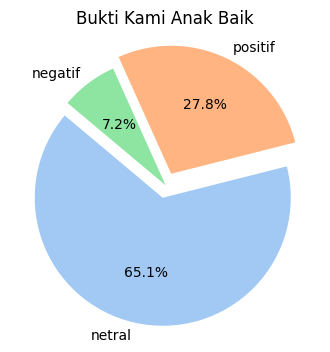

In [289]:
sentiment_counts = hasil_nltk['sentiment'].value_counts()

labels = sentiment_counts.index
sizes = sentiment_counts.values

pastel_colors = sns.color_palette("pastel", len(labels))
explode = (0.1, 0.1, 0) if len(labels) > 1 else (0,)
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=pastel_colors, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Bukti Kami Anak Baik')
plt.axis('equal')
plt.show()

## **TextBlob**

In [290]:
df_textblob=pd.DataFrame(data_1['sentences'])
df_textblob.sample(n=10, random_state=42)

,sentences
3544,mpok
184,capstone module 1
3439,yes
3446,ges
2683,anyway
1501,explicit content
211,yes
179,int functions functions tups dicts exercises html
1513,free
879,250 rows lost later


In [291]:
from textblob import TextBlob

labels=[]
scores=[]

for text in df_textblob['sentences']:
    blob=TextBlob(text)
    polarity=blob.sentiment.polarity

    if polarity>0:
        label='positif'
    elif polarity<0:
        label='negatif'
    else:
        label='netral'
    scores.append(polarity)
    labels.append(label)

df_textblob['sentiment_score']=scores
df_textblob['sentiment']=labels

hasil_textblob=df_textblob[['sentences','sentiment_score','sentiment']]

hasil_textblob.sample(n=10, random_state=42)

,sentences,sentiment_score,sentiment
3544,mpok,0.0,netral
184,capstone module 1,0.0,netral
3439,yes,0.0,netral
3446,ges,0.0,netral
2683,anyway,0.0,netral
1501,explicit content,0.0,netral
211,yes,0.0,netral
179,int functions functions tups dicts exercises html,0.0,netral
1513,free,0.4,positif
879,250 rows lost later,0.0,netral


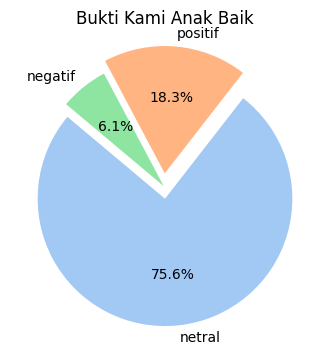

In [292]:
sentiment_counts=hasil_textblob['sentiment'].value_counts()

labels=sentiment_counts.index
sizes=sentiment_counts.values

pastel_colors=sns.color_palette("pastel",len(labels))
explode=(0.1,0.1,0) if len(labels) > 1 else (0,)
plt.figure(figsize=(4,4))
plt.pie(sizes,labels=labels,colors=pastel_colors,autopct='%1.1f%%',startangle=140,explode=explode)
plt.title('Bukti Kami Anak Baik')
plt.axis('equal')
plt.show()

## **VaderSentiment**

In [293]:
df_vadersentiment=pd.DataFrame(data_1['sentences'])
df_vadersentiment.head()

,sentences
0,created group jcds bandung raya
1,oji
2,ardy
3,give brother zulfikar invites
4,anton btw


In [294]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser=SentimentIntensityAnalyzer()


In [295]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# custom_lexicon = {
#     "terima":0.8,
#     "kasih": 0.8,
#     "seru":1,
#     "alhamdulillah":1,
#     "bahagia":1,
# }
# analyzer.lexicon.update(custom_lexicon)


In [296]:
scores=[analyser.polarity_scores(x) for x in df_vadersentiment['sentences']]
df_vadersentiment['sentiment_score']=[x['compound'] for x in scores]

df_vadersentiment.loc[df_vadersentiment['sentiment_score']>0,'sentiment']='positif'
df_vadersentiment.loc[df_vadersentiment['sentiment_score']==0,'sentiment']='netral'
df_vadersentiment.loc[df_vadersentiment['sentiment_score']<0,'sentiment']='negatif'
hasil_vadersentiment=df_vadersentiment[['sentences','sentiment_score','sentiment']]
hasil_vadersentiment.sample(n=10, random_state=42)

,sentences,sentiment_score,sentiment
3544,mpok,0.0000,netral
184,capstone module 1,0.0000,netral
3439,yes,0.4019,positif
3446,ges,0.0000,netral
2683,anyway,0.0000,netral
1501,explicit content,0.0000,netral
211,yes,0.4019,positif
179,int functions functions tups dicts exercises html,0.0000,netral
1513,free,0.5106,positif
879,250 rows lost later,-0.3182,negatif


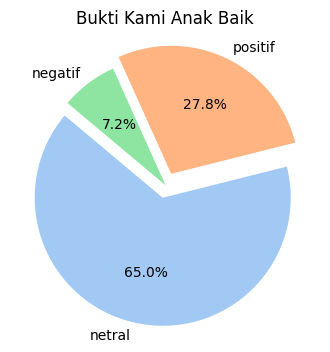

In [297]:
sentiment_counts = hasil_vadersentiment['sentiment'].value_counts()

labels = sentiment_counts.index
sizes = sentiment_counts.values

pastel_colors = sns.color_palette("pastel", len(labels))
explode = (0.1, 0.1, 0) if len(labels) > 1 else (0,)
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=pastel_colors, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Bukti Kami Anak Baik')
plt.axis('equal')
plt.show()

sentimen negatifnya sedikit

In [313]:
positive_messages=hasil_vadersentiment[hasil_vadersentiment['sentiment'] == 'positif']['sentences']
negative_messages=hasil_vadersentiment[hasil_vadersentiment['sentiment'] == 'negatif']['sentences']

positive_text=' '.join(positive_messages)
negative_text=' '.join(negative_messages)

positive_tokens=positive_text.split()
negative_tokens=negative_text.split()
positive_word_count=Counter(positive_tokens)
negative_word_count=Counter(negative_tokens)
positive_word_count_df=pd.DataFrame(positive_word_count.items(), columns=['Word', 'Frequency'])
negative_word_count_df=pd.DataFrame(negative_word_count.items(), columns=['Word', 'Frequency'])

positive_word_count_df=positive_word_count_df.sort_values(by='Frequency', ascending=False)
negative_word_count_df=negative_word_count_df.sort_values(by='Frequency', ascending=False)

positive_top_10=positive_word_count_df.head(10)
negative_top_10=negative_word_count_df.head(10)

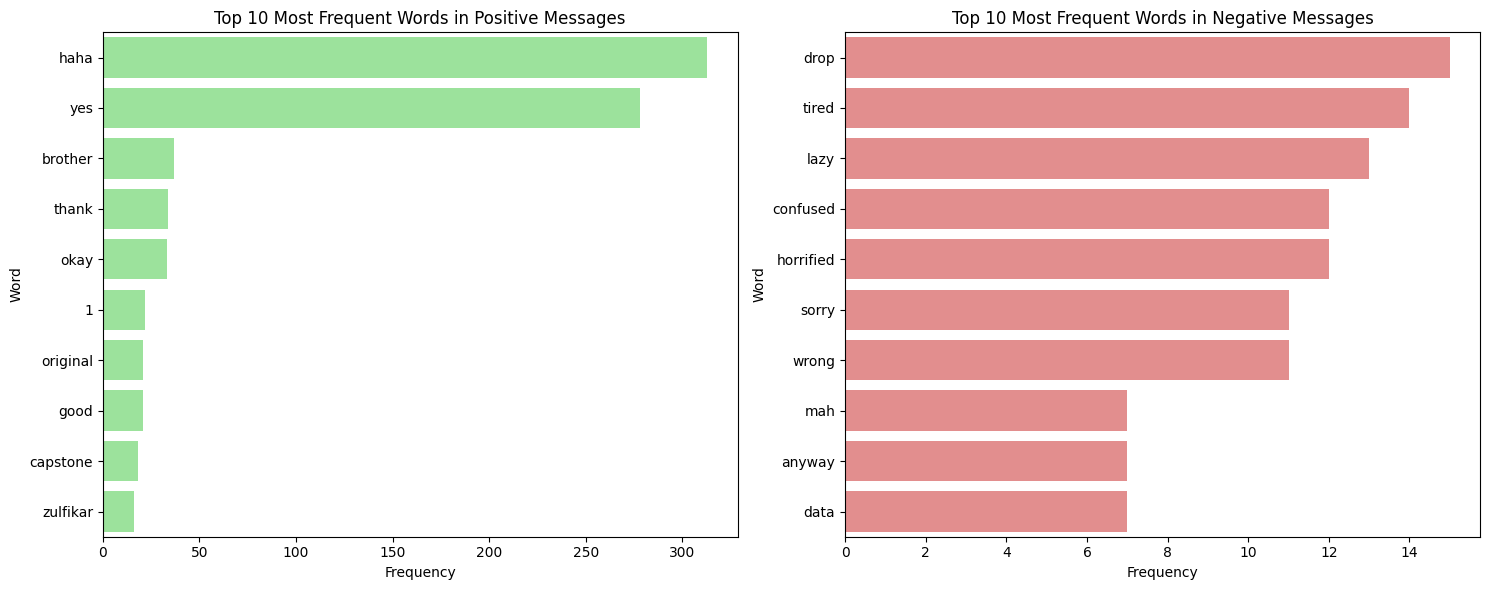

In [314]:
plt.figure(figsize=(15, 6))

plt.subplot(121)
sns.barplot(data=positive_top_10, x='Frequency', y='Word', color='lightgreen')
plt.title('Top 10 Most Frequent Words in Positive Messages')

plt.subplot(122)
sns.barplot(data=negative_top_10, x='Frequency', y='Word', color='lightcoral')
plt.title('Top 10 Most Frequent Words in Negative Messages')
plt.tight_layout()
plt.show()

In [315]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(hasil_vadersentiment['sentences'])
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8595 stored elements and shape (3560, 3051)>

In [316]:
#encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(hasil_vadersentiment['sentiment'])


In [317]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score,f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Akurasi: 0.8665730337078652
F1 Score: 0.8400966275574838
Laporan Klasifikasi:
               precision    recall  f1-score   support

     negatif       1.00      0.05      0.09        44
      netral       0.85      0.99      0.92       463
     positif       0.92      0.76      0.83       205

    accuracy                           0.87       712
   macro avg       0.92      0.60      0.61       712
weighted avg       0.88      0.87      0.84       712



In [318]:
from imblearn.pipeline import Pipeline as ImbalancedPipeline
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score,f1_score

pipeline = ImbalancedPipeline([
    ('tfidf', TfidfVectorizer()), #tf-idfnya
    ('nb', MultinomialNB()) #naivebayes
])

X_train, X_test, y_train, y_test = train_test_split(df_vadersentiment['sentences'], df_vadersentiment['sentiment'], test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted')) #karena lebih dari dua kelas
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8707865168539326
F1 Score: 0.8491202132538409
Classification Report:
               precision    recall  f1-score   support

     negatif       1.00      0.11      0.20        44
      netral       0.85      0.99      0.92       463
     positif       0.92      0.76      0.83       205

    accuracy                           0.87       712
   macro avg       0.92      0.62      0.65       712
weighted avg       0.88      0.87      0.85       712



In [319]:
#data tidak seimbang
from imblearn.pipeline import Pipeline as ImbalancedPipeline
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score,f1_score

pipeline = ImbalancedPipeline([
    ('tfidf', TfidfVectorizer()), #tf-idfnya
    ('smote', SMOTE(random_state=42)),
    ('nb', MultinomialNB()) #naivebayes
    #Multinomial Naive Bayes (MNB) adalah salah satu algoritma klasifikasi yang sering digunakan dalam pemrosesan teks dan analisis sentimen
])

X_train, X_test, y_train, y_test = train_test_split(df_vadersentiment['sentences'], df_vadersentiment['sentiment'], test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted')) #karena lebih dari dua kelas
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6783707865168539
F1 Score: 0.7212035231253235
Classification Report:
               precision    recall  f1-score   support

     negatif       0.18      0.80      0.29        44
      netral       0.96      0.57      0.72       463
     positif       0.76      0.89      0.82       205

    accuracy                           0.68       712
   macro avg       0.63      0.75      0.61       712
weighted avg       0.85      0.68      0.72       712



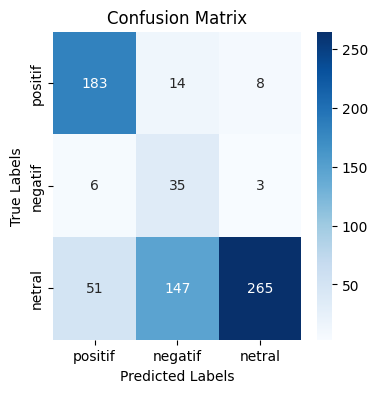

In [320]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=['positif', 'negatif', 'netral'])
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['positif', 'negatif', 'netral'], yticklabels=['positif', 'negatif', 'netral'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# **hyperparam**

In [321]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

pipeline=ImbalancedPipeline([
    ('tfidf',TfidfVectorizer()),#tf-idfnya
    ('smote',SMOTE(random_state=42)),
    ('nb',MultinomialNB())])

param_grid={
    'tfidf__ngram_range':[(1,1),(1,2)],
    'tfidf__max_df':[0.9,1.0],
    'tfidf__min_df':[1,2],
    'nb__alpha':[0.5,1.0,1.5]}

grid_search=GridSearchCV(pipeline,param_grid,cv=5,scoring='f1_weighted',verbose=1)
grid_search.fit(X_train,y_train)
print("Best Parameters:",grid_search.best_params_)
print("Best Score:",grid_search.best_score_)

best_pipeline=grid_search.best_estimator_
y_pred=best_pipeline.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("F1 Score:",f1_score(y_test,y_pred,average='weighted'))
print("Classification Report:\n",classification_report(y_test, y_pred))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'nb__alpha': 0.5, 'tfidf__max_df': 0.9, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 2)}
Best Score: 0.7122555192593707
Accuracy: 0.6839887640449438
F1 Score: 0.7275790799210433
Classification Report:
               precision    recall  f1-score   support

     negatif       0.18      0.80      0.30        44
      netral       0.94      0.60      0.73       463
     positif       0.78      0.86      0.82       205

    accuracy                           0.68       712
   macro avg       0.63      0.75      0.61       712
weighted avg       0.84      0.68      0.73       712



**Predict Tuned Model to Test Set**

In [322]:
#define tuned model
best_model=grid_search.best_estimator_

#fitting to train set
best_model.fit(X_train, y_train)

#predict to test set
y_pred_best=best_pipeline.predict(X_test)

#evaluate
print(f'f1-Score after tuning on test set: {f1_score(y_test, y_pred, average="weighted"):.3f}')

f1-Score after tuning on test set: 0.728


Prediction results on the test set:
- Before tuning = 0.721
- After tuning = 0.728

**Model Evaluation**

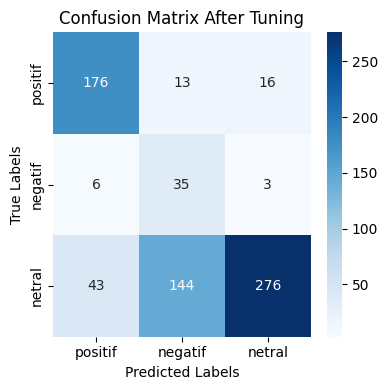

In [323]:
plt.figure(figsize=(4,4))
cm_after=confusion_matrix(y_test,y_pred_best,labels=['positif','negatif','netral'])
sns.heatmap(cm_after,annot=True,fmt='d',cmap='Blues',xticklabels=['positif','negatif','netral'],yticklabels=['positif','negatif','netral'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix After Tuning')
plt.tight_layout()
plt.show()

In [324]:
vectorizer=best_pipeline.named_steps['tfidf']
model=best_pipeline.named_steps['nb']

#ambil nama fitur dari vectorizer
feature_names=vectorizer.get_feature_names_out()
log_probs=model.feature_log_prob_

#dataframe
importance_df=pd.DataFrame({
    'Feature':np.array(feature_names),
    'Importance':np.mean(log_probs, axis=0)
})

importance_df 

,Feature,Importance
0,00,-8.867900
1,00 33,-9.309774
2,00 gasibu,-9.353711
3,00 wib,-9.091944
4,000,-7.960473
...,...,...
6570,zulfikar sister,-8.509228
6571,zulfikar suggestions,-9.363659
6572,zulfikar tumbler,-9.340803
6573,zuzur,-9.289505


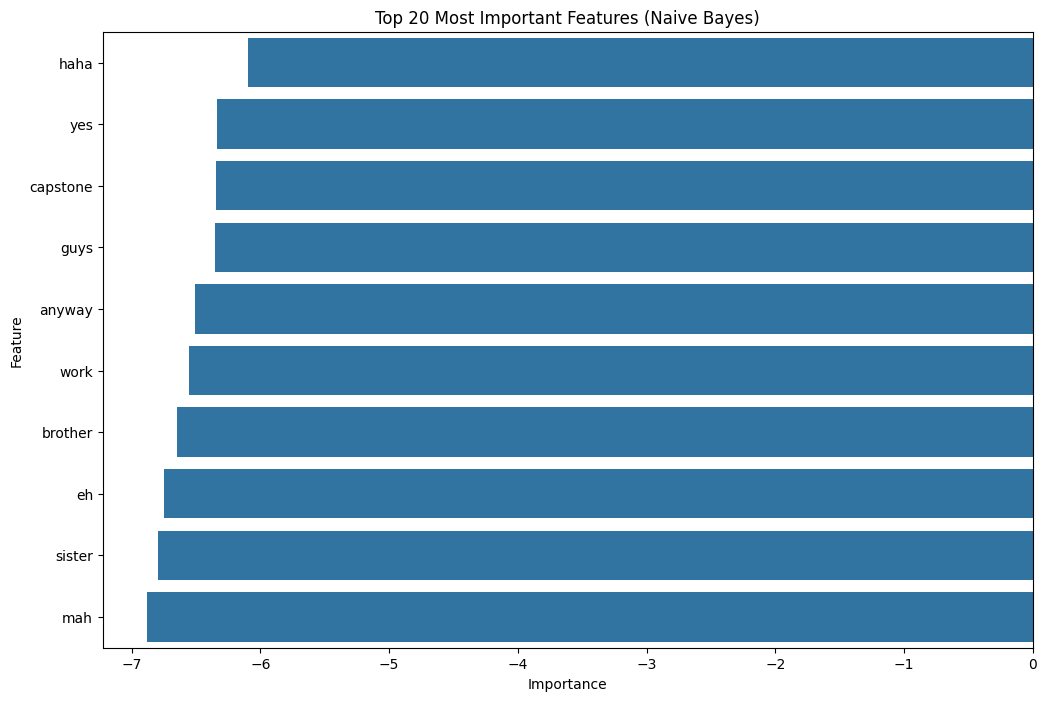

In [325]:
importance_df=importance_df.sort_values(by='Importance',ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x='Importance',y='Feature',data=importance_df.head(10))
plt.title('Top 20 Most Important Features (Naive Bayes)')
plt.show()

- Nilai negatif bukanlah masalah, melainkan indikasi dari probabilitas fitur untuk kelas yang kurang dari 1.
- Interpretasi harus dilakukan dengan mempertimbangkan bahwa Naive Bayes menggunakan log probabilitas, dan fitur dengan koefisien negatif masih berkontribusi pada klasifikasi tetapi dengan probabilitas lebih rendah.

- Akurasi dan F1 Score: Jika model Anda masih menunjukkan akurasi dan F1 score yang baik, meskipun semua koefisien negatif, ini menunjukkan bahwa model dapat membedakan antara kelas dengan baik.
- Feature Importance: Dalam Naive Bayes, fitur dengan koefisien yang lebih besar (lebih positif jika menggunakan skala probabilitas langsung) adalah yang lebih sering muncul dalam kelas tersebut. Namun, dalam log skala, Anda harus melihat fitur dengan nilai log probabilitas yang paling sedikit negatif untuk menentukan fitur penting.